In [1]:
%pylab inline
import numpy as np
import pandas as pd
import os
import sys
sys.path.insert(0, '/home/jfm343/Documents/Delafossites/integration_delafossite/Modular')
import Dispersion
import Lattice
from scipy import linalg as la
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
# pathMAC="/Users/jfmv/Documents/Proyectos/Moire-Phonon_QMC/BM_bandstructure"
pathchow='/home/jfm343/Documents/Delafossites/integration_delafossite'
pathMAC='/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite'
pathUBU='/home/juan/Documents/Projects/Delafossites/integration_delafossite'
pathy=pathchow

In [3]:
path=pathy+'/data/nu_sweep_2022-05-24-21-04-08'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df=pd.concat(frames)


reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/nu_sweep_2022-05-24-21-04-08/nu_sweep_0.3/data2022-05-24-20-24-34.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/nu_sweep_2022-05-24-21-04-08/nu_sweep_0.05/data2022-05-24-17-18-10.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/nu_sweep_2022-05-24-21-04-08/nu_sweep_0.2/data2022-05-24-23-24-21.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/nu_sweep_2022-05-24-21-04-08/nu_sweep_0.5/data2022-05-24-21-04-07.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/nu_sweep_2022-05-24-21-04-08/nu_sweep_0.1/data2022-05-24-18-21-16.h5


Machine arg is, CH1


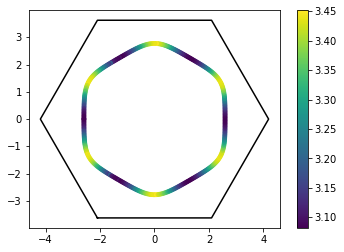

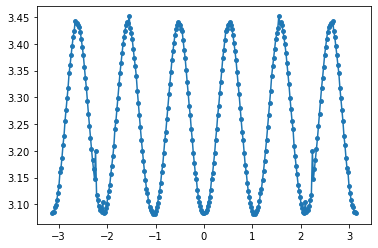

In [4]:
df2=df.loc[(df['nu'] ==0.5 )]
tss=df2['T'].unique()


l=Lattice.TriangLattice(10,10,'CH1')
[vx,vy]=l.boundary()
plt.plot(vx,vy, c='k')
plt.scatter(df2['KFX'], df2['KFY'],c=df2['SE'],  s=15)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.show()


df2=df2.sort_values(by=['theta'])
plt.scatter(df2['theta'], df2['SE'],  s=15)
plt.plot(df2['theta'], df2['SE'])
# plt.ylim([1.98,2.07])
plt.show()

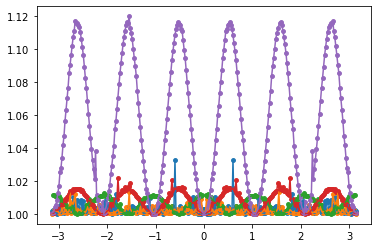

In [5]:
for i in [0.05,0.1,0.2,0.3,0.5]:
    df2=df.loc[(df['nu'] ==i )]
    tss=df2['T'].unique()


    thres=0.96+0.08*i
    df2=df2.sort_values(by=['theta'])
    plt.scatter(df2['theta'][df2['SE']<thres*np.max(df2['SE'])], df2['SE'][df2['SE']<thres*np.max(df2['SE'])]/np.min(df2['SE']),  s=15)
    plt.plot(df2['theta'][df2['SE']<thres*np.max(df2['SE'])], df2['SE'][df2['SE']<thres*np.max(df2['SE'])]/np.min(df2['SE']))
    # plt.ylim([1.98,2.07])
plt.show()

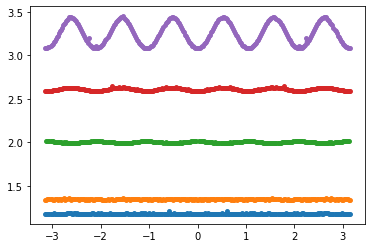

In [6]:
for i in [0.05,0.1,0.2,0.3,0.5]:
    df2=df.loc[(df['nu'] ==i )]
    tss=df2['T'].unique()



    thres=0.96+0.08*i
    df2=df2.sort_values(by=['theta'])
    plt.scatter(df2['theta'][df2['SE']<thres*np.max(df2['SE'])], df2['SE'][df2['SE']<thres*np.max(df2['SE'])],  s=15)
    plt.plot(df2['theta'][df2['SE']<thres*np.max(df2['SE'])], df2['SE'][df2['SE']<thres*np.max(df2['SE'])])
plt.show()

Machine arg is, CH1


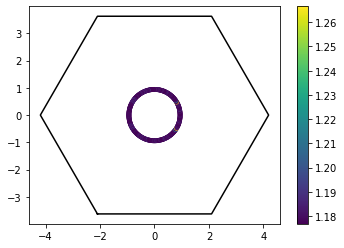

Machine arg is, CH1


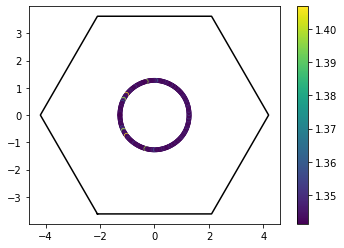

Machine arg is, CH1


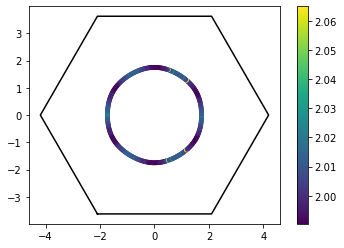

Machine arg is, CH1


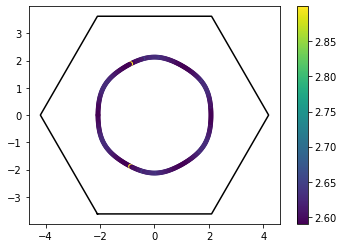

Machine arg is, CH1


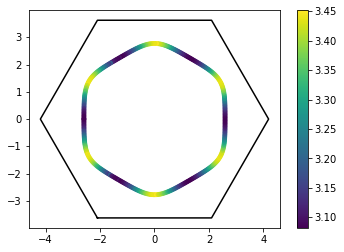

In [7]:
for i in [0.05,0.1,0.2,0.3,0.5]:
    df2=df.loc[(df['nu'] ==i )]
    tss=df2['T'].unique()


    thres=1
    df2=df2.sort_values(by=['theta'])
    
    l=Lattice.TriangLattice(10,10,'CH1')
    [vx,vy]=l.boundary()
    plt.plot(vx,vy, c='k')
    plt.scatter(df2['KFX'], df2['KFY'],c=df2['SE'],  s=15)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.colorbar()
    plt.show()

plt.show()

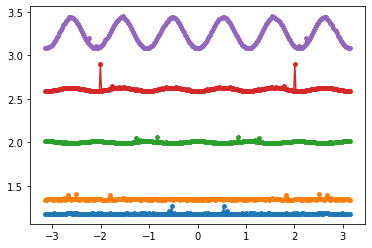

In [8]:
for i in [0.05,0.1,0.2,0.3,0.5]:
    
    df2=df.loc[(df['nu'] ==i )]
    tss=df2['T'].unique()

    thres=0.96+0.08*i
    df2=df2.sort_values(by=['theta'])
    plt.scatter(df2['theta'], df2['SE'],  s=15)
    plt.plot(df2['theta'], df2['SE'])
    
plt.show()

Machine arg is, CH1


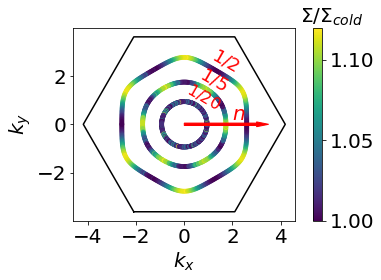

In [21]:
for i in [0.05,0.2,0.5]:
    df2=df.loc[(df['nu'] ==i )]
    tss=df2['T'].unique()


    thres=0.96+0.08*i
    if i==0.5:
        thres=1.1
    if i==0.05:
        thres=0.955
    df2=df2.sort_values(by=['theta'])
    
    
    
    kx=np.array(df2['KFX'][df2['SE']<thres*np.max(df2['SE'])])
    ky=np.array(df2['KFY'][df2['SE']<thres*np.max(df2['SE'])])
    se=np.array(df2['SE'][df2['SE']<thres*np.max(df2['SE'])])
    se=se/np.min(se)

    if i==0.5:
        im=plt.scatter(kx,ky ,c=se,  s=15)#,vmax=0.35,vmin=0.0)
    else:
        plt.scatter(kx,ky ,c=se,  s=15)#,vmax=0.35,vmin=0.0)

    plt.gca().set_aspect('equal', adjustable='box')

l=Lattice.TriangLattice(10,10,'CH1')
[vx,vy]=l.boundary()
plt.plot(vx,vy, c='k')


cbar = plt.colorbar(im)
tick_font_size = 20
cbar.ax.tick_params(labelsize=tick_font_size)
cbar.ax.locator_params(nbins=3)

plt.xlabel(r"$k_x$",size=20)
plt.ylabel(r"$k_y$",size=20)
pyplot.locator_params(axis='y', nbins=4)
pyplot.locator_params(axis='x', nbins=7)


plt.xticks(size=20)
plt.yticks(size=20)
plt.gca().set_aspect('equal', adjustable='box')

# plt.text(0.4,1.9,r'$1/2$', size=18, rotation=-30, c='k')
# plt.text(-.1,1,r'$1/5$', size=18, rotation=-30, c='k')
# plt.text(-.6,0.165,r'$1/20$', size=16, rotation=-30, c='k')
plt.text(1,2.2,r'$1/2$', size=18, rotation=-30, c='r')
plt.text(0.5,1.4,r'$1/5$', size=18, rotation=-30, c='r')
plt.text(0,0.6,r'$1/20$', size=16, rotation=-30, c='r')
plt.text(2,0.2,r'$n$', size=20, c='r')
plt.text(4.8,4.2,r'$\Sigma / \Sigma_{cold}$', size=20, c='k')
plt.arrow(0,0, 3, 0,head_width = 0.2, head_length=0.5,width = 0.1,ec ='r', color='r')
plt.tight_layout()

plt.savefig("./imgs/pap_figapp2.png", dpi=400, bbox_inches='tight')
plt.show()